In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
!pip install fast_pareto

Defaulting to user installation because normal site-packages is not writeable


In [31]:
from fast_pareto import is_pareto_front

# Сумматоры по модулю

Пусть задан модуль $m$ и соответствующая ему разрядность $n$ такая, что $2^{n - 1} < m < 2^n$. 

Сумма по модулю $m$ может быть вычислено через две суммы: 

$v = 2^{n} - m$,  $c_0, s_0 = x + y$, $c_1, s_1 = s_0 + v$ и 

$|x + y|_m = s_0$ если $c_0 = 0$ и $c_1 = 0$

$|x + y|_m = s_1$ иначе

Второй сумматор может быть сумматором константы. Колонка is_const.

Непосредственно сумматор может быть реализован по-разному, колонки type1 и type2. 

area и delay --- площадь и задержка сумматора по модулю, adder_1_area, adder_2_area, adder_1_delay, adder_2_delay --- эти же показатели для сумматоров, из которох состоит сумматор по моудлю.

synth, flatten, extract_fa, abc_script --- настройки синтезатора

Необходимо научиться предсказывать Парето-фронт

In [32]:
data_file = 'modular.csv'

In [33]:
data = pd.read_csv(data_file)
data.head()

,name,synth,flatten,extract_fa,abc_script,area,delay,module,type1,type2,bitwidth,const_v,is_const,adder_1_area,adder_2_area,adder_1_delay,adder_2_delay
0,n_2_input/adder_2_low_level_2_2.v,0,0,0,0,1.67670,112.31,2,adder,low,2,2,False,0.59778,0.59778,36.24,36.24
1,n_2_input/adder_2_low_level_2_2.v,0,0,0,1,1.72044,124.30,2,adder,low,2,2,False,0.64152,0.59778,38.66,36.24
2,n_2_input/adder_2_low_level_2_2.v,0,0,0,2,1.72044,123.80,2,adder,low,2,2,False,0.64152,0.59778,38.66,36.24
3,n_2_input/adder_2_low_level_2_2.v,0,0,0,3,1.77876,118.69,2,adder,low,2,2,False,0.64152,0.61236,39.39,35.37
4,n_2_input/adder_2_low_level_2_2.v,0,0,0,4,1.74960,108.73,2,adder,low,2,2,False,0.64152,0.61236,39.39,35.37


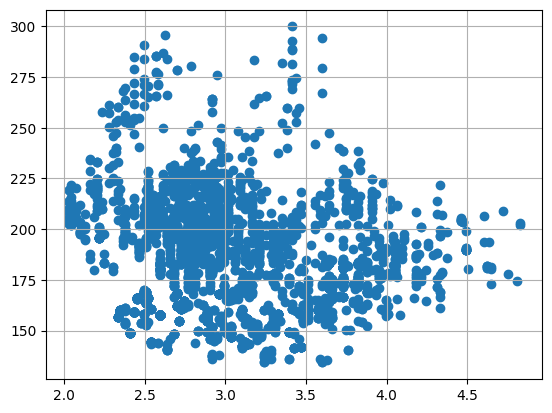

In [41]:
df_m = data[data.module == 13]
plt.scatter(df_m.area, df_m.delay)
plt.grid()

In [42]:
def get_pareto_points(dataframe):
    points = dataframe[['area', 'delay']]
    is_pareto = is_pareto_front(points)
    pareto_front = dataframe[is_pareto]
    return pareto_front

In [43]:
pareto_front = get_pareto_points(df_m)

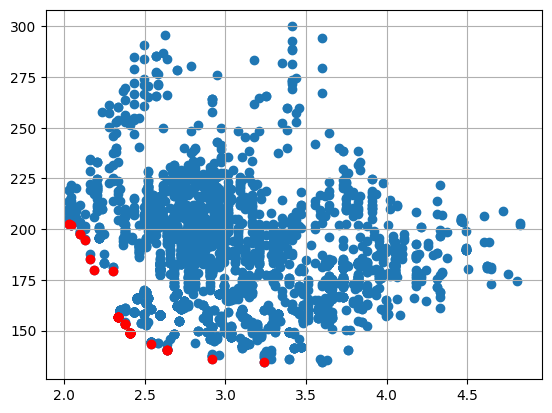

In [44]:
plt.scatter(df_m.area, df_m.delay)
plt.scatter(pareto_front.area, pareto_front.delay, c='r')
plt.grid()